In [4]:
## LIBRARIES 
import os
import sys
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

 Probabilidad de inmigración
 $$ P_I(t)=\frac{p_n(t)}{p_T(t)} $$
 Probabilidad de ocupación
 $$ P_o(t)=f(P_I(t))g(r) $$
con 
$$ f(P_I(t))=P_I(t)\pm \Delta_I,$$
$0\leq\Delta_I \leq aP_I(t), 0\leq a\leq1$ 
y 
$$ g(r)=e^{-br}$$
o
$$ g(r)=e^{br-cr^2}$$

Probabilidad de rechazo
$$ P_r(t)=p_T(t)/p_{id}$$

si $P_r(t)>1$, se expulsa en el tiempo $t+1$ la cantidad:
$$ (P_r-1+\Delta_r)p_T(t),$$
con $|\Delta_r|\leq P_r$


Si $P_r>1\Rightarrow P_o=0$

In [886]:
#Basic Functions
def P_I(p_n,p_T):
     return p_n/p_T
def f(P_I,a=1):
    Delta_I=np.random.uniform(-a,a)*P_I
    return P_I+ Delta_I
def g_1(r,b):
    return np.exp(-b*r)
def g_2(r,b,c):
    np.exp(b*r-c*r**2)    
def P_o1(P_I,a,r,b):
    return f(P_I,a)*g_1(r,b)
def P_o2(P_I,a,r,b,c):
    return f(P_I,a)*g_2(r,b,c)
def P_r(p_T,p_id):
    return p_T/p_id

In [207]:
#Data
mu, sigma = 100, 30 # mean and standard deviation
n = np.random.normal(mu, sigma, 100).round(0)
s=100
p=[n]
for i in range(s):
    p=np.concatenate((p,[n]), axis=0)
np.size(p)
p[2][2]
p

array([[117., 111.,  93., ..., 130.,  70., 105.],
       [117., 111.,  93., ..., 130.,  70., 105.],
       [117., 111.,  93., ..., 130.,  70., 105.],
       ...,
       [117., 111.,  93., ..., 130.,  70., 105.],
       [117., 111.,  93., ..., 130.,  70., 105.],
       [117., 111.,  93., ..., 130.,  70., 105.]])

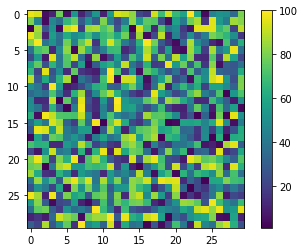

array([[ 97.,  94.,   5.,  11.,  78.,   6.,  53.,  11.,  26.,  53.,  10.,
         55.,  94.,  91.,  83.,  22.,  17.,  93.,  69.,  93.,  67.,  58.,
        100.,  60.,   4.,  45.,  52.,  50.,  35.,  80.],
       [ 81.,  46.,   4.,  47.,  36.,  67.,  77.,  29.,  51.,  30.,  81.,
         43.,  22.,  43.,  83.,  54.,  75.,  73.,  24.,   5.,  57.,  42.,
         78.,  88.,  16.,  95.,  54.,  42.,  86.,  82.],
       [  1.,  87.,  27.,  52.,   4.,  92.,  98.,  18.,  85.,  88.,  72.,
         81.,  27.,  65.,   1.,  93.,  71.,  12.,  74.,  40.,  49.,  18.,
          7.,  96.,  96.,  95.,  67.,  76.,  20.,  90.],
       [ 97.,  84.,  11.,  56.,  37.,  62.,  49.,  54.,  69.,  50.,  68.,
         74.,  59.,  78.,  12.,  86.,   4.,  24.,  90.,  10.,  45.,  22.,
         50.,  27.,  43.,  80.,  73.,  66.,  50.,  17.],
       [ 81.,  99.,  39.,  52.,  36.,  78.,  44.,  76.,  91.,  16.,  69.,
         94.,  73.,  42.,  27.,  65.,  99.,  79.,  29.,  15.,   4.,  34.,
         88.,  49.,  35.,  13., 

In [811]:
#Data:
#Distribución de Población
n=30
p = np.random.uniform(1, 100, (n, n)).round(0)
plt.imshow(p)
plt.colorbar()
plt.show()
p

In [570]:
poblacion_Total=np.sum(p)
poblacion_Total

45614.0

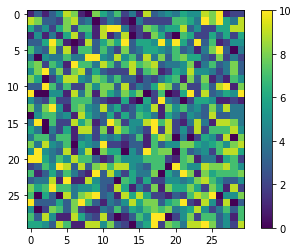

In [571]:
#Distribución de Población nueva
n=30
p_n = np.random.uniform(0, 10, (n, n)).round(0)
plt.imshow(p_n)
plt.colorbar()
plt.show()
#p_n

In [774]:
#Distribución de distancias
def distancia(A,c1,c2):
    n=int(np.sqrt(np.size(A)))
    d=np.copy(A)
    for i in range(n):
        for j in range(n):
            dist=np.sqrt((i-c1)**2+(j-c2)**2)
            d[i][j]=dist
            
    return d
center=np.array([15,0])
dist=distancia(p,float(center[0]),float(center[1]))

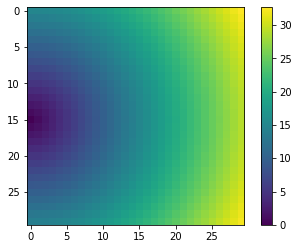

In [775]:
plt.imshow(dist)
plt.colorbar()
plt.show()

In [776]:
def crecimiento_natural_e(t,p,b):
    return p*np.exp(b*t).round(0)
def crecimiento_natural_lin(t,p,b):
    return b*p*t

In [777]:
def distrubucion(p,dist,p_n,T,b,Delta_r=0,Delta_o=0):
    poblacion=np.copy(p)
    p_inm=np.copy(p_n)
    n=int(np.sqrt(np.size(p)))
    #Población total
    p_T=np.sum(p)
    #Población ideal
    p_id=150
    #Población rechazada
    p_r=[0,0]
    #Main loop
    for t in range(T):
        p_e=np.zeros((n,n))
        for i in range(n):
            for j in range(n):                                
                #Crecimiento natural
                #poblacion[i][j]=poblacion[i][j]+crecimiento_natural_lin(t,poblacion[i][j],0.001)
                #poblacion[i][j]=poblacion[i][j]+np.random.uniform(5,10)
                poblacion[i][j]=poblacion[i][j]+5
                
                #Crecimiento por Inmigración
                poblacion[i][j]=poblacion[i][j]+p_inm[i][j]
                
                #Rechazo de población
                p_r=poblacion[i][j]/p_id
                if (p_r>1):
                    
                    #p_re=(p_r-1+np.random.uniform(0,Delta_r)*p_r)*poblacion[i][j]
                    p_re=(p_r-1)*poblacion[i][j]
                    
                    poblacion[i][j]=poblacion[i][j]-p_re
                    
                    p_e[i][j]=p_re
        #Población migrante total
        p_m=np.sum(p_e)
        
        #Migración por Probabilidad de Ocupación
        for i in range(n):
            for j in range(n):
                
                #distancia al centro
                r=dist[i][j]
                #probabilidad de inmigración
                if (poblacion[i][j]>0):
                    p_I=p_inm[i][j]/poblacion[i][j]
                if (poblacion[i][j]<=0):
                    p_I=0.001
                #Probabilidad de ocupación
                #p_o=np.exp(-b*r)*(p_I+np.random.uniform(0,Delta_o))
                #p_o=np.exp(-b*r)*(p_I)
                p_o=np.exp(-b*r)
                
                p_inm[i][j]=p_m*p_o
                
    return poblacion, p_inm,p_o

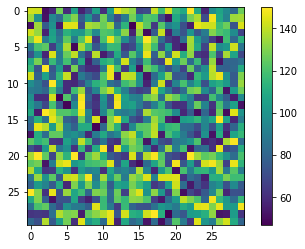

array([[143.        , 142.        ,  51.        ,  59.        ,
        128.        ,  60.        , 106.        ,  57.        ,
         71.        , 106.        ,  61.        , 104.        ,
        146.        , 138.        , 132.        ,  68.        ,
         71.        , 141.        , 118.        , 143.        ,
        116.        , 109.        , 150.        , 110.        ,
         58.        ,  98.        , 107.        ,  96.        ,
         82.        , 127.        ],
       [135.        ,  99.        ,  52.        ,  95.        ,
         83.        , 120.        , 131.        ,  77.        ,
        100.        ,  75.        , 128.        ,  92.        ,
         70.        ,  89.        , 128.        , 103.        ,
        122.        , 120.        ,  71.        ,  52.        ,
        109.        ,  94.        , 129.        , 137.        ,
         71.        , 148.        , 109.        ,  93.        ,
        135.        , 136.        ],
       [ 52.        , 135.    

In [812]:
T=9
b=0.01
Delta_r=0
Delta_o=0
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba

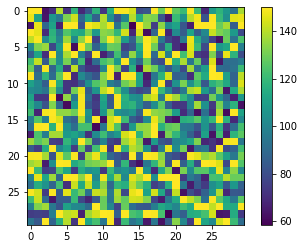

array([[149.83559252, 149.89526174,  62.95675561,  70.94533417,
        139.9295781 ,  71.90970396, 117.88596811,  68.85865408,
         82.82806058, 117.79449089,  72.75824414, 115.71960871,
        149.60690098, 149.63624536, 143.59200685,  79.54635655,
         82.49948898, 149.95993172, 129.40278587, 149.8736615 ,
        127.30309434, 120.25243457, 149.16352882, 121.14998765,
         69.0983683 , 109.04658157, 117.99468988, 106.94274872,
         92.89080744, 137.83890993],
       [147.03600599, 111.03349677,  64.02601242, 107.01367957,
         94.99669909, 131.97533245, 142.94988571,  88.92069307,
        111.88810164,  86.8524586 , 139.81410121, 103.77334963,
         81.73050238, 100.68583391, 139.63959375, 114.59200685,
        133.54327472, 131.49357692,  82.44307295,  63.39190409,
        120.34019525, 105.2880568 , 140.23558613, 148.18286921,
         82.1299819 , 149.45072154, 120.02395618, 103.97092915,
        145.91795625, 146.86507831],
       [ 64.10671902, 147.1039

In [813]:
T=10
b=0.01
Delta_r=0
Delta_o=0
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba

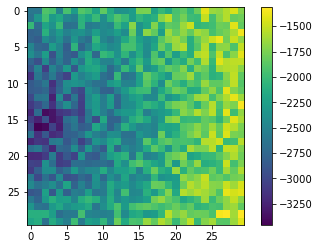

array([[-2607.18053576, -2605.87036143, -1906.26885691, -1957.99616673,
        -2494.79648889, -1940.7850422 , -2280.63558349, -1883.47526203,
        -1966.53292999, -2212.89785348, -1844.63031356, -2142.49684151,
        -2384.32136936, -2352.56556547, -2270.75629373, -1753.60806849,
        -1744.06469969, -2218.82299304, -2024.08049561, -2147.08162878,
        -1939.38439037, -1853.01937343, -2034.03464505, -1791.45658815,
        -1404.39301941, -1639.30033831, -1668.38450173, -1559.95070961,
        -1435.28445398, -1707.38348755],
       [-2638.26568916, -2334.59046683, -1961.54306269, -2287.31724736,
        -2179.12185523, -2463.29745476, -2535.94644536, -2077.4865979 ,
        -2234.14566464, -2013.82288021, -2405.73221052, -2087.92048209,
        -1891.80390644, -2002.94577877, -2274.03361492, -2043.36189929,
        -2155.54886119, -2104.06313705, -1707.10899351, -1543.80492479,
        -1912.86971708, -1768.41943537, -1990.05008064, -2013.66217988,
        -1508.63362028,

In [814]:
T=11
b=0.01
Delta_r=0
Delta_o=0
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba

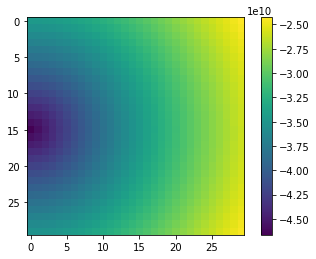

array([[-3.45425927e+10, -3.45196094e+10, -3.44721437e+10,
        -3.43573778e+10, -3.41853159e+10, -3.40059623e+10,
        -3.37623194e+10, -3.35065891e+10, -3.32055981e+10,
        -3.28722926e+10, -3.25329744e+10, -3.21530139e+10,
        -3.17567704e+10, -3.13532878e+10, -3.09385385e+10,
        -3.05257931e+10, -3.00901542e+10, -2.96344454e+10,
        -2.91928206e+10, -2.87389805e+10, -2.82922306e+10,
        -2.78411695e+10, -2.73829225e+10, -2.69370545e+10,
        -2.64966207e+10, -2.60419806e+10, -2.55957548e+10,
        -2.51565275e+10, -2.47215174e+10, -2.42805687e+10],
       [-3.52402943e+10, -3.52244398e+10, -3.51608562e+10,
        -3.50274578e+10, -3.48611757e+10, -3.46397283e+10,
        -3.43849626e+10, -3.41101907e+10, -3.37846623e+10,
        -3.34421355e+10, -3.30567955e+10, -3.26715169e+10,
        -3.22648115e+10, -3.18343353e+10, -3.13872435e+10,
        -3.09450703e+10, -3.04855717e+10, -3.00252018e+10,
        -2.95706292e+10, -2.91069526e+10, -2.86273466e+

In [815]:
T=12
b=0.01
Delta_r=0
Delta_o=0
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba

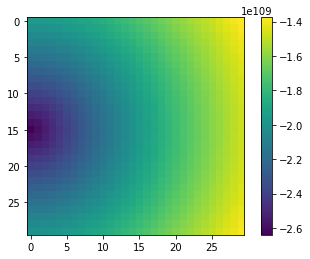

array([[-1.95676943e+109, -1.95546854e+109, -1.95158819e+109,
        -1.94519383e+109, -1.93638989e+109, -1.92531331e+109,
        -1.91212599e+109, -1.89700661e+109, -1.88014299e+109,
        -1.86172524e+109, -1.84194028e+109, -1.82096754e+109,
        -1.79897611e+109, -1.77612287e+109, -1.75255162e+109,
        -1.72839278e+109, -1.70376375e+109, -1.67876945e+109,
        -1.65350318e+109, -1.62804751e+109, -1.60247523e+109,
        -1.57685033e+109, -1.55122889e+109, -1.52565993e+109,
        -1.50018619e+109, -1.47484485e+109, -1.44966817e+109,
        -1.42468405e+109, -1.39991655e+109, -1.37538634e+109],
       [-1.99624514e+109, -1.99482349e+109, -1.99058608e+109,
        -1.98361341e+109, -1.97403305e+109, -1.96201088e+109,
        -1.94774078e+109, -1.93143402e+109, -1.91330950e+109,
        -1.89358550e+109, -1.87247331e+109, -1.85017266e+109,
        -1.82686890e+109, -1.80273145e+109, -1.77791337e+109,
        -1.75255162e+109, -1.72676785e+109, -1.70066946e+109,
       

In [816]:
T=15
b=0.01
Delta_r=0
Delta_o=0
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba

<ipython-input-777-7bf4a2712f5c>:29: RuntimeWarning: overflow encountered in double_scalars
  p_re=(p_r-1)*poblacion[i][j]


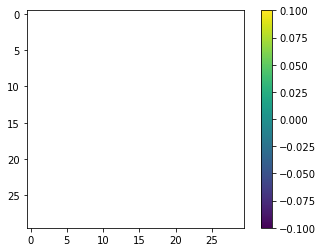

array([[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, 

In [817]:
T=17
b=0.01
Delta_r=0
Delta_o=0
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba

In [818]:
30*30*5

4500

In [903]:
def distrubucion(p,dist,p_n,T,b,p_id=150,Delta_r=0,Delta_o=0):
    poblacion=np.copy(p)
    p_inm=np.copy(p_n)
    n=int(np.sqrt(np.size(p)))
    #Población total
    p_T=np.sum(p)
    #Población ideal
    #p_id=150
    #Población rechazada
    #p_r=[0,0]
    
    #Probabilidad de ocupación (parte exponencial)
    p_oe=np.zeros((n,n))
    for i in range(n):
        for j in range(n):    
            #distancia al centro
            r=dist[i][j]
            p_oe[i][j]=np.exp(-b*r)
            
    p_oe=p_oe/np.sum(p_oe)
    
    #Main loop
    for t in range(T):
        p_e=np.zeros((n,n))
        for i in range(n):
            for j in range(n):                                
                #Crecimiento natural
                #poblacion[i][j]=poblacion[i][j]+crecimiento_natural_lin(t,poblacion[i][j],0.001)
                #poblacion[i][j]=poblacion[i][j]+np.random.uniform(5,10)
                poblacion[i][j]=poblacion[i][j]+5
                
                #Crecimiento por Inmigración
                poblacion[i][j]=poblacion[i][j]+p_inm[i][j]
                
                #Rechazo de población
                p_r=poblacion[i][j]-p_id
                if (p_r>0):
                    
                    #p_re=(p_r-1+np.random.uniform(0,Delta_r)*p_r)*poblacion[i][j]
                    #p_re=(p_r-1)*poblacion[i][j]
                    #p_re=p_r+int(np.random.uniform(0,Delta_r))
                    p_re=p_r
                    poblacion[i][j]=poblacion[i][j]-p_re
                    
                    p_e[i][j]=p_re
                    
        #Población migrante total:
        p_m=np.sum(p_e)
        
        #Migración por Probabilidad de Ocupación
        p_o=np.zeros((n,n))
        for i in range(n):
            for j in range(n):
                #probabilidad de inmigración
                if (poblacion[i][j]>0):
                    p_I=p_inm[i][j]/poblacion[i][j]
                if (poblacion[i][j]<=0.01):
                    p_I=0.1
                #Probabilidad de ocupación
                #p_o=np.exp(-b*r)*(p_I+np.random.uniform(0,Delta_o))
                #p_o=np.exp(-b*r)*(p_I)
                #p_o[i][j]=p_oe[i][j]*p_I
                p_o[i][j]=p_oe[i][j]
                
        p_o=p_o/np.sum(p_o)
        for i in range(n):
            for j in range(n):
                p_inm[i][j]=p_m*p_o[i][j]
                
    return poblacion, p_inm,p_o

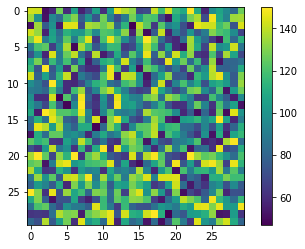

array([[143., 142.,  51.,  59., 128.,  60., 106.,  57.,  71., 106.,  61.,
        104., 146., 138., 132.,  68.,  71., 141., 118., 143., 116., 109.,
        150., 110.,  58.,  98., 107.,  96.,  82., 127.],
       [135.,  99.,  52.,  95.,  83., 120., 131.,  77., 100.,  75., 128.,
         92.,  70.,  89., 128., 103., 122., 120.,  71.,  52., 109.,  94.,
        129., 137.,  71., 148., 109.,  93., 135., 136.],
       [ 52., 135.,  77.,  99.,  55., 145., 145.,  70., 137., 134., 126.,
        136.,  82., 114.,  47., 140., 124.,  64., 123.,  91., 100.,  72.,
         55., 146., 143., 142., 118., 127.,  74., 144.],
       [143., 134.,  57., 105.,  83., 113., 103., 101., 120.,  96., 122.,
        120., 107., 132.,  57., 133.,  50.,  77., 141.,  57.,  90.,  74.,
        101.,  74.,  90., 131., 121., 117.,  97.,  68.],
       [129., 147.,  90., 107.,  88., 124.,  89., 122., 145.,  64., 120.,
        147., 124.,  97.,  75., 116., 150., 129.,  84.,  65.,  59.,  85.,
        136., 104.,  83.,  65., 

In [904]:
T=9
b=0.01
Delta_r=5
Delta_o=0
p_id=150
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,p_id,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba

In [905]:
np.max(p_oe)

nan

In [906]:
np.sum(p_oe/np.sum(p_oe))

nan

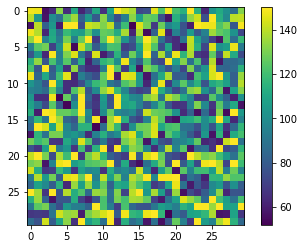

array([[148.00907952, 147.0090765 ,  56.00906747,  64.00905259,
        133.00903205,  65.00900615, 111.00897521,  62.00893961,
         76.00889973, 111.00885598,  66.00880873, 109.00875837,
        150.        , 143.00864972, 137.00859206,  73.00853256,
         76.00847147, 146.00840902, 123.00834543, 148.00828086,
        121.00821549, 114.00814946, 150.        , 115.00801593,
         63.00794865, 103.00788115, 112.00781351, 101.00774581,
         87.00767811, 132.00761047],
       [140.00917077, 104.0091675 ,  57.00915774, 100.00914167,
         88.00911954, 125.00909169, 136.00905852,  82.00902047,
        105.00897799,  80.00893153, 133.00888154,  97.00882842,
         75.00877257,  94.00871435, 133.00865408, 108.00859206,
        127.00852854, 125.00846376,  76.00839794,  57.00833124,
        114.00826385,  99.00819589, 134.0081275 , 142.00805879,
         76.00798985, 150.        , 114.00785166,  98.00778254,
        140.0077135 , 141.00764458],
       [ 57.00926294, 140.0092

In [907]:
T=10
b=0.01
Delta_r=5
Delta_o=0
p_id=150
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,p_id,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba

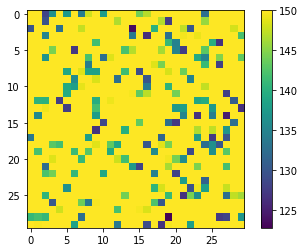

array([[150.        , 150.        , 128.47412001, 136.43722252,
        150.        , 137.32211747, 150.        , 134.15719847,
        148.05836477, 150.        , 137.83281953, 150.        ,
        150.        , 150.        , 150.        , 144.1483069 ,
        146.99689905, 150.        , 150.        , 150.        ,
        150.        , 150.        , 150.        , 150.        ,
        132.70106018, 150.        , 150.        , 150.        ,
        150.        , 150.        ],
       [150.        , 150.        , 129.69785731, 150.        ,
        150.        , 150.        , 150.        , 150.        ,
        150.        , 150.        , 150.        , 150.        ,
        146.74319849, 150.        , 150.        , 150.        ,
        150.        , 150.        , 146.81464446, 127.64934109,
        150.        , 150.        , 150.        , 150.        ,
        145.80318939, 150.        , 150.        , 150.        ,
        150.        , 150.        ],
       [129.95858372, 150.    

In [908]:
T=20
b=0.01
Delta_r=5
Delta_o=0
p_id=150
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,p_id,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba

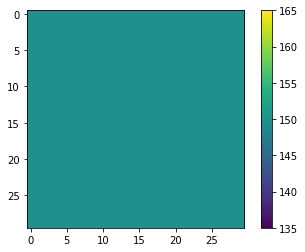

array([[150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
        150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
        150., 150., 150., 150., 150., 150., 150., 150.],
       [150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
        150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
        150., 150., 150., 150., 150., 150., 150., 150.],
       [150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
        150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
        150., 150., 150., 150., 150., 150., 150., 150.],
       [150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
        150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
        150., 150., 150., 150., 150., 150., 150., 150.],
       [150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
        150., 150., 150., 150., 150., 150., 150., 150., 150., 150., 150.,
        150., 150., 150., 150., 

In [909]:
T=25
b=0.01
Delta_r=5
Delta_o=0
p_id=150
Prueba,p_inm,p_o=distrubucion(p,dist,p_n,T,b,p_id,Delta_r,Delta_o)
plt.imshow(Prueba)
plt.colorbar()
plt.show()
Prueba